In [250]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from textblob import TextBlob

In [251]:
# Задание 1.
# Выберите датасет, который имеет отношение к вашей области интересов или исследований.
# Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи,
# например, анализа настроений или распознавания именованных сущностей.

Выбран датасет Singapore Airlines Reviews с kaggle.com:

https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews

In [252]:
# Загрузка датасета
reviews = pd.read_csv('singapore_airlines_reviews.csv', engine='python', on_bad_lines='skip')

In [253]:
reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [254]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [255]:
# Задание 2.
# Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета.
# Разработайте и реализуйте набор правил или условий,
# которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [256]:
# Определение функции для получения полярности настроения текста сообщения:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [257]:
# Применение функции к столбцу 'text' датасета для получения полярности настроения каждого твита
reviews['sentiment'] = reviews['text'].apply(get_sentiment)

In [258]:
reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,0.168006
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,0.176834
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,-0.170000
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,0.693750
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,-0.235648


In [259]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [260]:
# Применение функции к столбцу 'sentiment' датасета для присвоения меток настроения
reviews['sentiment_label'] = reviews['sentiment'].apply(get_sentiment_label)

In [261]:
reviews

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,0.168006,positive
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,0.176834,positive
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,-0.170000,negative
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,0.693750,positive
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,-0.235648,negative
...,...,...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,0.442500,positive
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1,0.425000,positive
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,0.479167,positive
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2,0.094444,positive


<Axes: >

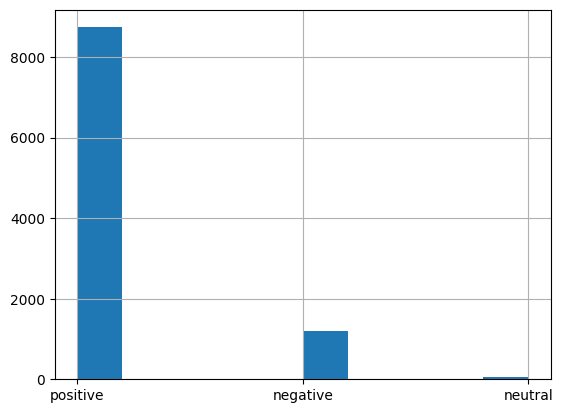

In [262]:
reviews['sentiment_label'].hist()

In [263]:
# Задача 3.
# Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

# Задача 4.
# Объедините данные, размеченные вручную, с данными, размеченными на основе правил.
# Объедините два подмножества размеченных данных в один набор данных,
# сохранив при этом соответствующую структуру и целостность.

Ручная разметка выполнена отдельно для датасета 'singapore_airlines_reviews.csv' в качестве демонстрации знакомства с инструментом, скриншоты приложены.

In [264]:
# Задача 5.
# Обучите модель машинного обучения, используя объединенный набор размеченных данных.
# Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Для дальнейшей работы возьмем данные только с положительными или отрицательными сообщениями.

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [266]:
reviews = reviews[
    (reviews['sentiment_label'] == 'positive')
    | (reviews['sentiment_label'] == 'negative')
]

In [267]:
reviews['sentiment_label'].value_counts()

sentiment_label
positive    8738
negative    1197
Name: count, dtype: int64

In [268]:
# Замена 'negative' на 0 и 'positive' на 1
reviews['sentiment_label'] = reviews['sentiment_label'].replace({'negative': 0, 'positive': 1})

C:\Users\Nataliya\AppData\Local\Temp\ipykernel_25908\482020284.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reviews['sentiment_label'] = reviews['sentiment_label'].replace({'negative': 0, 'positive': 1})
C:\Users\Nataliya\AppData\Local\Temp\ipykernel_25908\482020284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_label'] = reviews['sentiment_label'].replace({'negative': 0, 'positive': 1})


In [269]:
reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,0.168006,1
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,0.176834,1
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,-0.170000,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,0.693750,1
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,-0.235648,0


<Axes: >

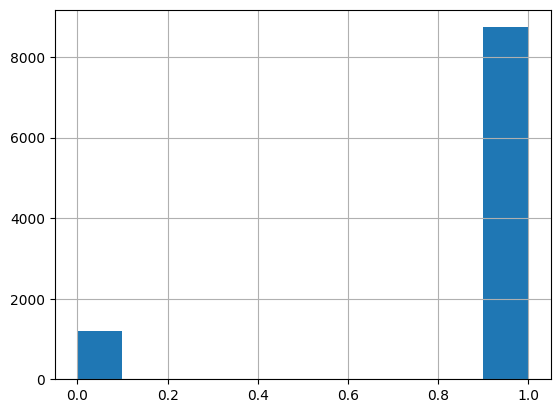

In [270]:
reviews['sentiment_label'].hist()

In [271]:
# Перемешивание данных
reviews = shuffle(reviews)

In [272]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.2, random_state=42)

In [273]:
labeled_reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
1514,2020-03-11T03:23:43-04:00,Desktop,2,review,Having read the reviews we were excited to say...,With this airline - READ THE T's & C's!!!!,2,0.139798,1
4215,2019-08-03T14:53:14-04:00,Mobile,5,review,I continued my lucky upgrade streak with a tim...,Relaxing Flight,2,0.245848,1
2937,2019-11-12T17:03:36-05:00,Desktop,2,review,Very disappointed with our overnight flight fr...,Mr,1,-0.133333,0
6608,2019-02-26T16:02:00-05:00,Mobile,5,review,We booked the tickets back from Koh Samui to B...,The best!,1,0.526042,1
7877,2018-12-17T10:09:22-05:00,Mobile,5,review,Traveling with Singapore airline means:\nExcel...,Best airline!,0,0.666667,1


In [274]:
unlabeled_reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
8477,2018-10-29T09:28:04-04:00,Mobile,5,review,Travelled to Jakarta with the Airbus and had a...,Smooth and awesome,0,0.680000,1
3638,2019-09-10T21:46:04-04:00,Desktop,4,review,travelled on a A350 from Adelaide to Singapore...,staff very attentive,1,0.530000,1
574,2023-02-02T23:52:36-05:00,Desktop,1,review,Flight sold as having flexible flight changes ...,Changing flight is impossible on a flexible fare,3,0.018571,1
5074,2019-06-18T03:21:37-04:00,Desktop,5,review,"From the beginning, check-in at the airport, a...",Truly the best airline in the world!,1,0.487879,1
4207,2019-08-04T06:32:59-04:00,Mobile,4,review,I would like to highlight the flight experienc...,Unexpected Bad Service,1,0.068750,1


In [275]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_reviews):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews['text'])
    y = labeled_reviews['sentiment_label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [276]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_reviews)

In [277]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_reviews['text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [278]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [279]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [280]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [281]:
labeled_reviews

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
1514,2020-03-11T03:23:43-04:00,Desktop,2,review,Having read the reviews we were excited to say...,With this airline - READ THE T's & C's!!!!,2,0.139798,1
4215,2019-08-03T14:53:14-04:00,Mobile,5,review,I continued my lucky upgrade streak with a tim...,Relaxing Flight,2,0.245848,1
2937,2019-11-12T17:03:36-05:00,Desktop,2,review,Very disappointed with our overnight flight fr...,Mr,1,-0.133333,0
6608,2019-02-26T16:02:00-05:00,Mobile,5,review,We booked the tickets back from Koh Samui to B...,The best!,1,0.526042,1
7877,2018-12-17T10:09:22-05:00,Mobile,5,review,Traveling with Singapore airline means:\nExcel...,Best airline!,0,0.666667,1
...,...,...,...,...,...,...,...,...,...
7392,2018-12-30T20:12:27-05:00,Desktop,4,review,Very comfortable and spacious business class s...,Great business class seats.,0,0.517500,1
7662,2018-12-17T21:56:23-05:00,Desktop,5,review,"The best flight I have been, in terms of comfo...","Great Service, Excellent flight",0,0.660556,1
6170,2019-03-28T12:09:25-04:00,Mobile,5,review,The best airline ever.Excellent service.Delici...,Sister's 30th Birthday,0,1.000000,1
8464,2018-10-30T20:27:26-04:00,Desktop,5,review,I only fly with Singapore airlines from Sydney...,best airline,1,0.426667,1


In [282]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_reviews)

In [283]:
# Задача 6.
# Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки.
# Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [284]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(unlabeled_reviews['text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(unlabeled_reviews['sentiment_label'], y_test_predicted)

print(f1)

0.9366461291186713


Таким образом, модель на тестовом датасете оценилась в среднем с 0.9366,

т.е. с вероятностью около 93.66% модели удалось предсказать эмоциональную оценку сообщений на тестовой выборке.

Это довольно высокий результат.